# Alphavirus RdRp conservation Analysis

# Direct Coupling Analysis (DCA), direct information (DI)

Traditional covariance methods can identify correlated variables (like amino acid residues in proteins that change together) but can't differentiate if these correlations are direct (two variables directly influencing each other) or indirect (their correlation is due to both being influenced by a third variable).  

DCA goes beyond traditional covariance methods by attempting to infer direct interactions between variables (e.g., amino acid residues in a protein) from large multiple sequence alignments (MSAs). The output of DCA includes scores for pairs of positions in a sequence, indicating the strength and likelihood that they interact directly, rather than merely appearing to interact due to indirect effects mediated by other positions.  

### How DCA Works
**Multiple Sequence Alignment**: DCA begins with an MSA, which aligns sequences from similar proteins across different species or variants. This alignment helps identify conserved and variable positions across sequences.    

**Covariance Calculation**: DCA calculates the covariance for each pair of positions in the MSA. High covariance suggests that changes in one position often coincide with changes in another, which might indicate some form of interaction.    

**Inferring Direct Interactions**:
Unlike simpler covariance methods, DCA uses statistical models to differentiate direct interactions from indirect correlations.
The model assigns a score to each possible pair of residues, with higher scores indicating a stronger likelihood of direct interaction.   

**Inversion of the Covariance Matrix**: One approach within DCA involves inverting the covariance matrix of the alignment to extract direct information, which helps in separating direct from indirect interactions.

In [1]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import Entrez, SeqIO, AlignIO
from Bio.PDB import PDBParser, PDBIO, Chain

import ast

pd.set_option('display.max_columns', 110)

In [2]:
def Zscore(column_val):
    m = np.mean(column_val)
    std = np.std(column_val)
    zscore = [((x - m)/std) for x in column_val]
    return zscore

## Covariance analysis on nsP4

In [3]:
#names = ['first_site', 'second_site', 'APC']
#cov = pd.read_csv('results/DCA/nsP4/PLMDCA_seqid_99_apc_fn_scores_Trimmed_alphavirus_nsP4_psiblast_rvdb_rmdup2_seq_idt30_filteredX_ref_aligned.txt', skiprows=12, sep='\s+', header=None, names=names)
#cov = pd.read_csv('results/DCA/nsP4/v02/PLMDCA_FN_APC_nsp4-RdRp-compact_seqIdt0.85_lh1_lj20.txt', skiprows=12, sep='\s+', header=None, names=names)
cov = pd.read_csv('results/DCA/nsP4/v02/PLMDCA_FN_APC_nsp4-RdRp-extended_seqIdt0.85_lh1_lj20.txt', sep='\t')


cov['Tuple'] =  cov.apply(lambda row: (int(row['first_site']), int(row['second_site'])), axis=1)
cov = cov[['first_site', 'second_site', 'Tuple', 'APC']]
cov

,first_site,second_site,Tuple,APC
0,154,156,"(154, 156)",0.042384
1,240,473,"(240, 473)",0.042111
2,75,216,"(75, 216)",0.041125
3,89,496,"(89, 496)",0.038877
4,103,240,"(103, 240)",0.038817
...,...,...,...,...
186350,48,56,"(48, 56)",-0.017077
186351,156,510,"(156, 510)",-0.017118
186352,48,522,"(48, 522)",-0.017196
186353,76,589,"(76, 589)",-0.018063


In [4]:
cov['Zscore'] = Zscore(cov['APC'])
cov.head()

,first_site,second_site,Tuple,APC,Zscore
0,154,156,"(154, 156)",0.042384,6.986639
1,240,473,"(240, 473)",0.042111,6.941640
2,75,216,"(75, 216)",0.041125,6.779092
3,89,496,"(89, 496)",0.038877,6.408369
4,103,240,"(103, 240)",0.038817,6.398505


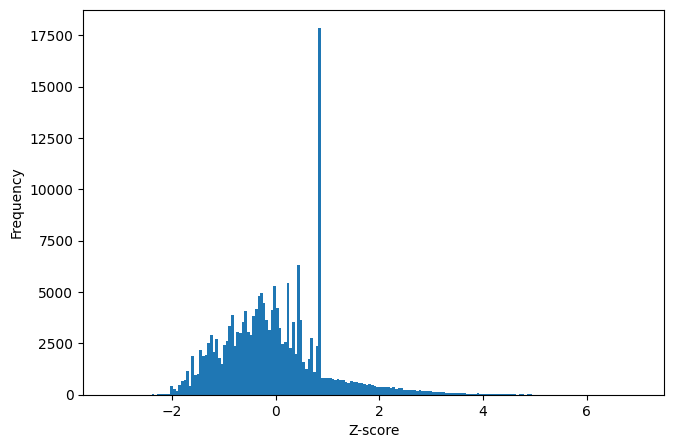

In [5]:
plt.figure(figsize=(7.5,5))
cov['Zscore'].plot(kind='hist', bins=200)
plt.xlabel('Z-score')
#plt.yscale('log')
#plt.savefig('results/DCA/nsP4/mfdca_nsp4_extended_Zscore_hist.png', dpi=400)
plt.show()

In [6]:
cov_ext_Nter = cov.query("first_site <100 or second_site < 100")
cov_ext_Nter

,first_site,second_site,Tuple,APC,Zscore
2,75,216,"(75, 216)",0.041125,6.779092
3,89,496,"(89, 496)",0.038877,6.408369
5,57,60,"(57, 60)",0.038604,6.363442
7,83,252,"(83, 252)",0.038299,6.313130
9,53,216,"(53, 216)",0.038046,6.271492
...,...,...,...,...,...
186349,32,510,"(32, 510)",-0.016632,-2.742436
186350,48,56,"(48, 56)",-0.017077,-2.815767
186352,48,522,"(48, 522)",-0.017196,-2.835447
186353,76,589,"(76, 589)",-0.018063,-2.978245


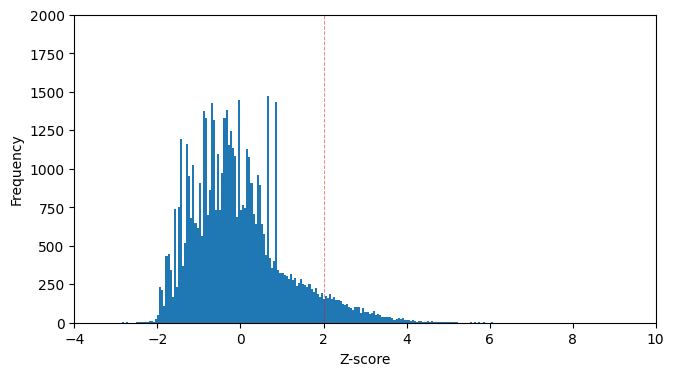

In [7]:
plt.figure(figsize=(7.5, 4))
cov_ext_Nter['Zscore'].plot(kind='hist', bins=200)
plt.xlabel('Z-score')
plt.xlim(-4,10)
plt.ylim(-0,2000)
plt.vlines(2, 0, 2000, color='red', linestyle='--', linewidth=0.7, alpha=0.5)
plt.savefig('results/DCA/nsP4/v02/mfdca_nsp4_Nterm_extended_Zscore_hist.png', dpi=600, bbox_inches='tight')
plt.show()

In [8]:
cov_ext_Nter['Zscore'].min(), cov_ext_Nter['Zscore'].max()

(-3.2044426609489114, 6.779092000832817)

In [9]:
neff = pd.read_excel('results/neff/nsp4_extended_Neff_psiblast_mapped.xlsx')
neff

,residueName,residueAbbrev,residue,Neff
0,Tyr,Y,1,1.005212
1,Ile,I,2,1.009583
2,Phe,F,3,1.005212
3,Ser,S,4,1.000000
4,Ser,S,5,1.311368
...,...,...,...,...
606,Tyr,Y,607,1.000000
607,Gly,G,608,1.195720
608,Gly,G,609,1.013201
609,Pro,P,610,1.000000


In [10]:
df1 = cov_ext_Nter.merge(neff, left_on='first_site', right_on='residue', how='left')
df1.rename(columns={'Neff': 'first_site_Neff', 'residueName':'first_site_residue'}, inplace=True)
df1 = df1[['first_site_residue','first_site','first_site_Neff', 'second_site', 'Tuple', 'APC', 'Zscore',]]
df2 = df1.merge(neff, left_on='second_site', right_on='residue', how='left')
df2.rename(columns={'Neff': 'second_site_Neff', 'residueName':'second_site_residue'}, inplace=True)

cov_ext_Nter_neff = df2[['first_site_residue', 'first_site', 'first_site_Neff',
                            'second_site_residue', 'second_site', 'second_site_Neff',
                            'Tuple', 'APC', 'Zscore',]]

cov_ext_Nter_neff = cov_ext_Nter_neff.query("Zscore > 2")
cov_ext_Nter_neff['Tuple'] = cov_ext_Nter_neff['Tuple'].astype(str) 
cov_ext_Nter_neff

,first_site_residue,first_site,first_site_Neff,second_site_residue,second_site,second_site_Neff,Tuple,APC,Zscore
0,Met,75,4.808267,Pro,216,1.000000,"(75, 216)",0.041125,6.779092
1,Ala,89,4.551939,Ala,496,1.268383,"(89, 496)",0.038877,6.408369
2,Ser,57,1.867111,Asn,60,1.000000,"(57, 60)",0.038604,6.363442
3,Gly,83,1.000000,Asn,252,1.560988,"(83, 252)",0.038299,6.313130
4,Gln,53,1.014685,Pro,216,1.000000,"(53, 216)",0.038046,6.271492
...,...,...,...,...,...,...,...,...,...
3571,Ala,56,1.872983,Thr,456,1.865939,"(56, 456)",0.012141,2.000989
3572,Arg,99,3.108927,Phe,596,1.136985,"(99, 596)",0.012141,2.000833
3573,Asp,91,2.175003,Ser,110,3.257055,"(91, 110)",0.012140,2.000785
3574,Thr,92,5.201170,Phe,361,1.142657,"(92, 361)",0.012136,2.000092


In [11]:
extended_contact = pd.read_table('data/nsP4/nsP4_pdb/nsp4-RdRp_extended_pairs_contact_v02.txt')
extended_contact 

,Contact,Residue1_Name,Residue1_Pos,Residue2_Name,Residue2_Pos,Pairs,Distance(Å)
0,1,TYR,1,TYR,1,"(1, 1)",0.00
1,2,TYR,1,ILE,2,"(1, 2)",3.83
2,3,TYR,1,PHE,3,"(1, 3)",6.21
3,4,TYR,1,SER,4,"(1, 4)",5.69
4,5,TYR,1,SER,5,"(1, 5)",5.75
...,...,...,...,...,...,...,...
60651,60652,ILE,100,TYR,607,"(100, 607)",58.53
60652,60653,ILE,100,GLY,608,"(100, 608)",58.84
60653,60654,ILE,100,GLY,609,"(100, 609)",61.57
60654,60655,ILE,100,PRO,610,"(100, 610)",65.11


In [12]:
cols=['Contact',	'Residue1_Name',	'Residue1_Pos',	'Residue2_Name',	'Residue2_Pos',	'Pairs',]
df = cov_ext_Nter_neff.merge(extended_contact, left_on='Tuple', right_on='Pairs', how='inner').drop(cols, axis=1)
df

,first_site_residue,first_site,first_site_Neff,second_site_residue,second_site,second_site_Neff,Tuple,APC,Zscore,Distance(Å)
0,Met,75,4.808267,Pro,216,1.000000,"(75, 216)",0.041125,6.779092,28.06
1,Ala,89,4.551939,Ala,496,1.268383,"(89, 496)",0.038877,6.408369,49.85
2,Ser,57,1.867111,Asn,60,1.000000,"(57, 60)",0.038604,6.363442,6.48
3,Gly,83,1.000000,Asn,252,1.560988,"(83, 252)",0.038299,6.313130,26.63
4,Gln,53,1.014685,Pro,216,1.000000,"(53, 216)",0.038046,6.271492,40.45
...,...,...,...,...,...,...,...,...,...,...
3526,Ala,56,1.872983,Thr,456,1.865939,"(56, 456)",0.012141,2.000989,57.18
3527,Arg,99,3.108927,Phe,596,1.136985,"(99, 596)",0.012141,2.000833,41.40
3528,Asp,91,2.175003,Ser,110,3.257055,"(91, 110)",0.012140,2.000785,50.00
3529,Thr,92,5.201170,Phe,361,1.142657,"(92, 361)",0.012136,2.000092,40.77


In [13]:
df1= df[df['first_site'].between(20, 90) | df['second_site'].between(20, 90) ]
df2 = df1[abs(df1['first_site'] -  df1['second_site']) >= 4].copy() 
df2 = df2.query('`Distance(Å)` < 10 & Zscore > 2')
df2

,first_site_residue,first_site,first_site_Neff,second_site_residue,second_site,second_site_Neff,Tuple,APC,Zscore,Distance(Å)
52,Leu,49,3.252741,Asn,60,1.000000,"(49, 60)",0.029109,4.798198,9.35
71,Arg,51,1.562481,Ser,55,5.554254,"(51, 55)",0.028165,4.642531,6.81
75,Pro,38,1.131964,Met,75,4.808267,"(38, 75)",0.028043,4.622457,8.63
84,Arg,51,1.562481,Asn,60,1.000000,"(51, 60)",0.027791,4.580855,8.19
202,Thr,20,4.197054,Val,24,4.043379,"(20, 24)",0.024336,4.011369,9.97
206,Ile,76,2.130973,Leu,80,1.334861,"(76, 80)",0.024262,3.999178,6.08
375,Gln,53,1.014685,Asn,60,1.000000,"(53, 60)",0.022147,3.650464,9.37
429,Leu,49,3.252741,Gln,53,1.014685,"(49, 53)",0.021661,3.570386,6.97
776,Leu,88,1.712180,Gln,398,3.225992,"(88, 398)",0.019385,3.195188,8.06
886,Glu,42,3.570427,Gln,46,3.559214,"(42, 46)",0.018858,3.108290,6.23


In [14]:
extended_rASA = pd.read_excel('results/rASA/nsp4_rASA_extended.xlsx', index_col=0)
extended_rASA

,Residue,position,rASA
0,Y,1,0.555133
1,I,2,0.040609
2,F,3,0.216667
3,S,4,0.361290
4,S,5,0.154839
...,...,...,...
606,Y,607,0.250951
607,G,608,0.317308
608,G,609,0.346154
609,P,610,0.930818


In [15]:
mapping = {k:v for k, v in zip(extended_rASA['position'], extended_rASA['rASA'])}

In [16]:
df2['first_site_rASA'] = [mapping[x] for x in df2['first_site']]
df2['second_site_rASA'] = [mapping[x] for x in df2['second_site']]


cols =['first_site_residue', 'first_site', 'first_site_Neff','first_site_rASA',
       'second_site_residue', 'second_site', 'second_site_Neff',  'second_site_rASA',
       'Tuple', 'APC', 'Zscore', 'Distance(Å)', ]

df2 = df2[cols].copy()
df2

,first_site_residue,first_site,first_site_Neff,first_site_rASA,second_site_residue,second_site,second_site_Neff,second_site_rASA,Tuple,APC,Zscore,Distance(Å)
52,Leu,49,3.252741,0.233831,Asn,60,1.000000,0.107692,"(49, 60)",0.029109,4.798198,9.35
71,Arg,51,1.562481,0.405109,Ser,55,5.554254,0.419355,"(51, 55)",0.028165,4.642531,6.81
75,Pro,38,1.131964,0.729560,Met,75,4.808267,0.325893,"(38, 75)",0.028043,4.622457,8.63
84,Arg,51,1.562481,0.405109,Asn,60,1.000000,0.107692,"(51, 60)",0.027791,4.580855,8.19
202,Thr,20,4.197054,0.220930,Val,24,4.043379,0.591954,"(20, 24)",0.024336,4.011369,9.97
206,Ile,76,2.130973,0.426396,Leu,80,1.334861,0.537313,"(76, 80)",0.024262,3.999178,6.08
375,Gln,53,1.014685,0.546667,Asn,60,1.000000,0.107692,"(53, 60)",0.022147,3.650464,9.37
429,Leu,49,3.252741,0.233831,Gln,53,1.014685,0.546667,"(49, 53)",0.021661,3.570386,6.97
776,Leu,88,1.712180,0.328358,Gln,398,3.225992,0.355556,"(88, 398)",0.019385,3.195188,8.06
886,Glu,42,3.570427,0.309417,Gln,46,3.559214,0.391111,"(42, 46)",0.018858,3.108290,6.23


In [17]:
df2.to_excel('results/DCA/nsP4/v02/nsp4_extended_contact_pairs_neff_APC_Zscore_rASA_Nter_20_90.xlsx', index=False)

## Contacts of SOI

In [18]:
ext_cont = pd.read_excel('results/neff/nsp4_extended_SOI_neff.xlsx')
ext_cont = ext_cont[~ext_cont['nsp4'].isna()]
ext_cont['nsp4-Nter'].str.split('-').str[1]
ext_cont['contact_pairs'] = [x for x in zip(ext_cont['nsp4-Nter'].str.split('-').str[1].astype(int), ext_cont['nsp4'].str.split('-').str[1].astype(int))]
print(ext_cont.shape)
ext_cont

(30, 6)


,nsp4-Nter,Neff_nsp4-Nter,nsp4,Neff_nsp4,Interaction,contact_pairs
0,Thr-20,4.804889,Tyr-102,1.663264,bb-bb (Hb),"(20, 102)"
1,Asn-25,4.656432,Thr-101,4.159606,Sc-bb (Hb),"(25, 101)"
2,Tyr-36,1.551579,Cys-233,1.000000,Sc-bb (Hb),"(36, 233)"
3,Lys-39,4.107283,Glu-226,1.157364,Sc-Sc (Hb),"(39, 226)"
4,Lys-81,3.360074,Glu-392,1.012403,NaN,"(81, 392)"
5,Lys-81,3.360074,Asp-393,1.000000,Sc-Sc (Hb),"(81, 393)"
6,Cys-84,4.192845,Ala-242,2.673552,Sc-bb (Hb),"(84, 242)"
7,Arg-85,3.290797,Asp-397,1.158375,Sc-Sc (Hb),"(85, 397)"
8,Ser-90,3.642532,Asp-91,2.664443,Sc-bb (Hb),"(90, 91)"
9,Thr-21,5.725334,Pro-103,1.116649,Sc-Sc,"(21, 103)"


In [19]:
pairs = list(ext_cont['contact_pairs'].values)
res = cov.query('Tuple in @pairs')
res.query('Zscore > 2.0')

,first_site,second_site,Tuple,APC,Zscore
287,29,98,"(29, 98)",0.026191,4.317051
435,90,91,"(90, 91)",0.024512,4.040328
855,80,242,"(80, 242)",0.021993,3.625119
936,25,101,"(25, 101)",0.021599,3.560116
1097,84,242,"(84, 242)",0.020955,3.453949
2950,76,239,"(76, 239)",0.016859,2.778739
3607,85,397,"(85, 397)",0.015881,2.617458
4650,31,456,"(31, 456)",0.014610,2.408000


In [20]:
cols = ['first_site', 'second_site', 'Tuple']
df = ext_cont.merge(res, how='inner', left_on='contact_pairs', right_on='Tuple').drop(cols, axis=1).sort_values('APC', ascending=False)
print(df.shape)
df

(30, 8)


,nsp4-Nter,Neff_nsp4-Nter,nsp4,Neff_nsp4,Interaction,contact_pairs,APC,Zscore
13,Glu-29,3.431639,Tyr-98,1.251589,Sc-Sc (Hb),"(29, 98)",0.026191,4.317051
8,Ser-90,3.642532,Asp-91,2.664443,Sc-bb (Hb),"(90, 91)",0.024512,4.040328
29,Leu-80,1.515866,Ala-242,2.673552,Sc-Sc,"(80, 242)",0.021993,3.625119
1,Asn-25,4.656432,Thr-101,4.159606,Sc-bb (Hb),"(25, 101)",0.021599,3.560116
6,Cys-84,4.192845,Ala-242,2.673552,Sc-bb (Hb),"(84, 242)",0.020955,3.453949
24,Ile-76,2.320685,Arg-239,3.419841,NaN,"(76, 239)",0.016859,2.778739
7,Arg-85,3.290797,Asp-397,1.158375,Sc-Sc (Hb),"(85, 397)",0.015881,2.617458
17,His-31,4.374393,Thr-456,2.069111,Sc-SC,"(31, 456)",0.014610,2.408000
12,Ile-26,3.877464,Thr-101,4.159606,Sc-Sc,"(26, 101)",0.009571,1.577271
10,Ile-26,3.877464,Tyr-98,1.251589,NaN,"(26, 98)",0.007899,1.301680


In [21]:
df.to_excel('results/DCA/nsP4/v02/nsp4_extended_SOI_contact_pairs_neff_APC_Zscore.xlsx', index=False)

# Compact structure

In [22]:
cov = pd.read_csv('results/DCA/nsP4/v02/PLMDCA_FN_APC_nsp4-RdRp-compact_seqIdt0.85_lh1_lj20.txt', sep='\t')

cov['Tuple'] =  cov.apply(lambda row: (int(row['first_site']), int(row['second_site'])), axis=1)
cov = cov[['first_site', 'second_site', 'Tuple', 'APC']]
cov

,first_site,second_site,Tuple,APC
0,154,156,"(154, 156)",0.042383
1,240,473,"(240, 473)",0.042074
2,75,216,"(75, 216)",0.041132
3,89,496,"(89, 496)",0.038871
4,103,240,"(103, 240)",0.038781
...,...,...,...,...
186350,48,56,"(48, 56)",-0.017077
186351,156,510,"(156, 510)",-0.017122
186352,48,522,"(48, 522)",-0.017198
186353,76,589,"(76, 589)",-0.018071


In [23]:
cov['Zscore'] = Zscore(cov['APC'])
cov.head()

,first_site,second_site,Tuple,APC,Zscore
0,154,156,"(154, 156)",0.042383,6.986679
1,240,473,"(240, 473)",0.042074,6.935736
2,75,216,"(75, 216)",0.041132,6.780390
3,89,496,"(89, 496)",0.038871,6.407690
4,103,240,"(103, 240)",0.038781,6.392929


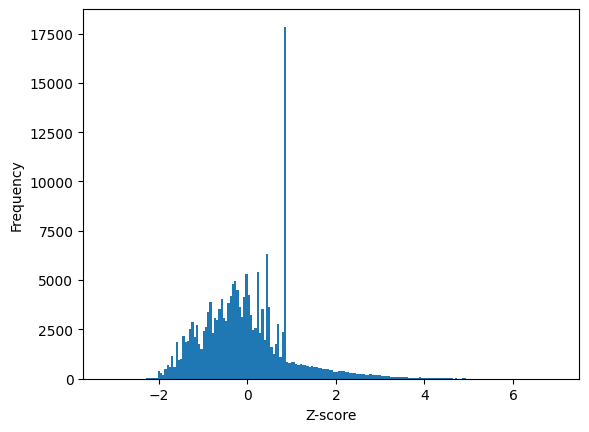

In [24]:
cov['Zscore'].plot(kind='hist', bins=200)
plt.xlabel('Z-score')
#plt.savefig('results/alphavirus/DCA/mfdca_nsp4_compact_Zscore_hist.png')
plt.show()

In [25]:
cov_comp_Nter = cov.query("first_site <105 or second_site < 105")
cov_comp_Nter

,first_site,second_site,Tuple,APC,Zscore
2,75,216,"(75, 216)",0.041132,6.780390
3,89,496,"(89, 496)",0.038871,6.407690
4,103,240,"(103, 240)",0.038781,6.392929
5,57,60,"(57, 60)",0.038604,6.363633
7,83,252,"(83, 252)",0.038303,6.314038
...,...,...,...,...,...
186349,32,510,"(32, 510)",-0.016636,-2.743144
186350,48,56,"(48, 56)",-0.017077,-2.815859
186352,48,522,"(48, 522)",-0.017198,-2.835846
186353,76,589,"(76, 589)",-0.018071,-2.979681


In [26]:
# neff v02 is from psiblast alignment
neff = pd.read_excel('results/neff/nsp4_compact_Neff_psiblast_mapped.xlsx')

df1 = cov_comp_Nter.merge(neff, left_on='first_site', right_on='residue', how='left')
df1.rename(columns={'Neff': 'first_site_Neff', 'residueName':'first_site_residue'}, inplace=True)
df1 = df1[['first_site_residue','first_site','first_site_Neff', 'second_site', 'Tuple', 'APC', 'Zscore',]]
df2 = df1.merge(neff, left_on='second_site', right_on='residue', how='left')
df2.rename(columns={'Neff': 'second_site_Neff', 'residueName':'second_site_residue'}, inplace=True)

cov_comp_Nter_neff = df2[['first_site_residue', 'first_site', 'first_site_Neff',
                            'second_site_residue', 'second_site', 'second_site_Neff',
                            'Tuple', 'APC', 'Zscore',]]


cov_comp_Nter_neff = cov_comp_Nter_neff.query("Zscore > 2.0")
cov_comp_Nter_neff['Tuple'] = cov_comp_Nter_neff['Tuple'].astype(str)
cov_comp_Nter_neff

,first_site_residue,first_site,first_site_Neff,second_site_residue,second_site,second_site_Neff,Tuple,APC,Zscore
0,Met,75,4.808267,Pro,216,1.000000,"(75, 216)",0.041132,6.780390
1,Ala,89,4.551939,Ala,496,1.268383,"(89, 496)",0.038871,6.407690
2,Pro,103,1.114821,Glu,240,2.289969,"(103, 240)",0.038781,6.392929
3,Ser,57,1.867111,Asn,60,1.000000,"(57, 60)",0.038604,6.363633
4,Gly,83,1.000000,Asn,252,1.560988,"(83, 252)",0.038303,6.314038
...,...,...,...,...,...,...,...,...,...
3688,Gln,19,1.147578,Thr,580,3.448442,"(19, 580)",0.012139,2.000620
3689,Ala,56,1.872983,Thr,456,1.865939,"(56, 456)",0.012139,2.000608
3690,Glu,91,2.175003,Ser,110,3.257055,"(91, 110)",0.012138,2.000525
3691,Arg,99,3.108927,Phe,596,1.136985,"(99, 596)",0.012137,2.000369


### Adding distance in Å

In [27]:
compact_contact = pd.read_table('data/nsP4/nsP4_pdb/nsp4-RdRp_compact_pairs_contact_v02.txt')
compact_contact 

,Contact,Residue1_Name,Residue1_Pos,Residue2_Name,Residue2_Pos,Pairs,Distance(Å)
0,1,TYR,1,TYR,1,"(1, 1)",0.00
1,2,TYR,1,ILE,2,"(1, 2)",3.84
2,3,TYR,1,PHE,3,"(1, 3)",5.81
3,4,TYR,1,SER,4,"(1, 4)",5.35
4,5,TYR,1,SER,5,"(1, 5)",5.94
...,...,...,...,...,...,...,...
61095,61096,ILE,100,TYR,607,"(100, 607)",60.02
61096,61097,ILE,100,GLY,608,"(100, 608)",60.80
61097,61098,ILE,100,GLY,609,"(100, 609)",63.66
61098,61099,ILE,100,PRO,610,"(100, 610)",67.34


In [28]:
cols=['Contact',	'Residue1_Name',	'Residue1_Pos',	'Residue2_Name',	'Residue2_Pos',	'Pairs',]
df = cov_comp_Nter_neff.merge(compact_contact, left_on='Tuple', right_on='Pairs', how='inner').drop(cols, axis=1)
df

,first_site_residue,first_site,first_site_Neff,second_site_residue,second_site,second_site_Neff,Tuple,APC,Zscore,Distance(Å)
0,Met,75,4.808267,Pro,216,1.000000,"(75, 216)",0.041132,6.780390,48.64
1,Ala,89,4.551939,Ala,496,1.268383,"(89, 496)",0.038871,6.407690,48.89
2,Ser,57,1.867111,Asn,60,1.000000,"(57, 60)",0.038604,6.363633,6.33
3,Gly,83,1.000000,Asn,252,1.560988,"(83, 252)",0.038303,6.314038,14.17
4,Gln,53,1.014685,Pro,216,1.000000,"(53, 216)",0.038058,6.273726,70.05
...,...,...,...,...,...,...,...,...,...,...
3593,Arg,51,1.562481,Ser,499,2.675964,"(51, 499)",0.012140,2.000871,62.88
3594,Gln,19,1.147578,Thr,580,3.448442,"(19, 580)",0.012139,2.000620,31.41
3595,Ala,56,1.872983,Thr,456,1.865939,"(56, 456)",0.012139,2.000608,62.94
3596,Glu,91,2.175003,Ser,110,3.257055,"(91, 110)",0.012138,2.000525,47.59


In [29]:
df1= df[df['first_site'].between(20, 90) | df['second_site'].between(20, 90) ]
df2 = df1[abs(df1['first_site'] -  df1['second_site']) >= 4] 
df2 = df2.query('`Distance(Å)` < 10')
df2

,first_site_residue,first_site,first_site_Neff,second_site_residue,second_site,second_site_Neff,Tuple,APC,Zscore,Distance(Å)
39,Val,27,1.457653,Arg,99,3.108927,"(27, 99)",0.030044,4.952548,5.74
55,Leu,49,3.252741,Asn,60,1.000000,"(49, 60)",0.029113,4.798923,8.55
74,Arg,51,1.562481,Ser,55,5.554254,"(51, 55)",0.028163,4.642377,6.93
78,Pro,38,1.131964,Met,75,4.808267,"(38, 75)",0.028042,4.622359,9.78
86,Arg,51,1.562481,Asn,60,1.000000,"(51, 60)",0.027795,4.581690,7.06
127,Glu,29,3.290982,Tyr,98,1.180829,"(29, 98)",0.026190,4.317149,4.43
208,Thr,20,4.197054,Val,24,4.043379,"(20, 24)",0.024334,4.011039,8.05
212,Ile,76,2.130973,Leu,80,1.334861,"(76, 80)",0.024263,3.999369,5.94
383,Gln,53,1.014685,Asn,60,1.000000,"(53, 60)",0.022154,3.651803,9.07
439,Leu,49,3.252741,Gln,53,1.014685,"(49, 53)",0.021663,3.570699,6.20


### Adding rASA

In [30]:
compact_rASA = pd.read_excel('results/rASA/nsp4_rASA_compact.xlsx', index_col=0)
compact_rASA

,Residue,position,rASA
0,Y,1,0.638783
1,I,2,0.233503
2,F,3,0.258333
3,S,4,0.212903
4,S,5,0.180645
...,...,...,...
606,Y,607,0.334601
607,G,608,0.259615
608,G,609,0.423077
609,P,610,0.911950


In [31]:
mapping = {k:v for k, v in zip(compact_rASA['position'], compact_rASA['rASA'])}

In [32]:
df2['first_site_rASA'] = [mapping[x] for x in df2['first_site']]
df2['second_site_rASA'] = [mapping[x] for x in df2['second_site']]


cols =['first_site_residue', 'first_site', 'first_site_Neff','first_site_rASA',
       'second_site_residue', 'second_site', 'second_site_Neff',  'second_site_rASA',
       'Tuple', 'APC', 'Zscore', 'Distance(Å)', ]

df2 = df2[cols]
df2

,first_site_residue,first_site,first_site_Neff,first_site_rASA,second_site_residue,second_site,second_site_Neff,second_site_rASA,Tuple,APC,Zscore,Distance(Å)
39,Val,27,1.457653,0.551724,Arg,99,3.108927,0.215328,"(27, 99)",0.030044,4.952548,5.74
55,Leu,49,3.252741,0.288557,Asn,60,1.000000,0.133333,"(49, 60)",0.029113,4.798923,8.55
74,Arg,51,1.562481,0.547445,Ser,55,5.554254,0.606452,"(51, 55)",0.028163,4.642377,6.93
78,Pro,38,1.131964,0.150943,Met,75,4.808267,0.285714,"(38, 75)",0.028042,4.622359,9.78
86,Arg,51,1.562481,0.547445,Asn,60,1.000000,0.133333,"(51, 60)",0.027795,4.581690,7.06
127,Glu,29,3.290982,0.286996,Tyr,98,1.180829,0.509506,"(29, 98)",0.026190,4.317149,4.43
208,Thr,20,4.197054,0.174419,Val,24,4.043379,0.448276,"(20, 24)",0.024334,4.011039,8.05
212,Ile,76,2.130973,0.005076,Leu,80,1.334861,0.114428,"(76, 80)",0.024263,3.999369,5.94
383,Gln,53,1.014685,0.591111,Asn,60,1.000000,0.133333,"(53, 60)",0.022154,3.651803,9.07
439,Leu,49,3.252741,0.288557,Gln,53,1.014685,0.591111,"(49, 53)",0.021663,3.570699,6.20


In [33]:
df2.to_excel('results/DCA/nsP4/v02/nsp4_compact_contact_pairs_neff_APC_Zscore_Nter_rASA_20_90.xlsx', index=False)

## Contacts of SOI

In [34]:
compact_cont = pd.read_excel('results/neff/nsp4_compact_SOI_neff.xlsx')
compact_cont = compact_cont[~compact_cont['nsp4'].str.contains('nsp1')]
compact_cont['nsp4-Nter'].str.split('-').str[1]
compact_cont['contact_pairs'] = [x for x in zip(compact_cont['nsp4-Nter'].str.split('-').str[1].astype(int), compact_cont['nsp4'].str.split('-').str[1].astype(int))]
print(compact_cont.shape)
compact_cont

(28, 5)


,nsp4-Nter,Neff_nsp4-Nter,nsp4,Neff_nsp4,contact_pairs
0,Thr-20,4.804889,Thr-101,4.159606,"(20, 101)"
1,Thr-20,4.804889,Tyr-102,1.663264,"(20, 102)"
3,Tyr-36,1.551579,Thr-258,1.843036,"(36, 258)"
4,Lys-39,4.107283,Glu-70,1.165855,"(39, 70)"
5,Lys-81,3.360074,Thr-250,2.527476,"(81, 250)"
6,Cys-84,4.192845,Leu-253,2.789005,"(84, 253)"
7,Cys-84,4.192845,Leu-278,1.000000,"(84, 278)"
18,Glu-29,3.431639,His-31,4.374393,"(29, 31)"
19,Val-30,5.015656,Arg-99,3.245180,"(30, 99)"
20,Val-30,5.015656,Arg-332,1.000000,"(30, 332)"


In [35]:
pairs = list(compact_cont['contact_pairs'].values)
res = cov.query('Tuple in @pairs')
res.query('Zscore > 2.0')

,first_site,second_site,Tuple,APC,Zscore
1540,30,99,"(30, 99)",0.019595,3.229795
2283,80,253,"(80, 253)",0.017931,2.955514
4572,29,31,"(29, 31)",0.014664,2.416905


In [36]:
cols = ['first_site', 'second_site', 'Tuple']
df = compact_cont.merge(res, how='inner', left_on='contact_pairs', right_on='Tuple').drop(cols, axis=1).sort_values('APC', ascending=False)
df

,nsp4-Nter,Neff_nsp4-Nter,nsp4,Neff_nsp4,contact_pairs,APC,Zscore
8,Val-30,5.015656,Arg-99,3.245180,"(30, 99)",0.019595,3.229795
20,Leu-80,1.515866,Leu-253,2.789005,"(80, 253)",0.017931,2.955514
7,Glu-29,3.431639,His-31,4.374393,"(29, 31)",0.014664,2.416905
15,Pro-38,1.144242,Ile-77,3.586551,"(38, 77)",0.011149,1.837471
18,Ile-77,3.586551,Leu-253,2.789005,"(77, 253)",0.010110,1.666147
4,Lys-81,3.360074,Thr-250,2.527476,"(81, 250)",0.006766,1.114826
17,Ile-76,2.320685,Leu-268,1.151631,"(76, 268)",0.005993,0.987455
10,Glu-33,1.259029,Lys-34,3.089355,"(33, 34)",0.005347,0.880909
6,Cys-84,4.192845,Leu-278,1.000000,"(84, 278)",0.005051,0.832147
16,Ile-76,2.320685,Val-257,1.457569,"(76, 257)",0.004402,0.725185


In [37]:
df.to_excel('results/DCA/nsP4/v02/nsp4_compact_SOI_contact_pairs_neff_APC_Zscore.xlsx', index=False)